In [1]:
from glob import glob
import pandas as pd
import numpy as np
from scipy import stats  
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
files = glob("../csv/演習問題_データアナリティクス基礎/*")
for i, f in enumerate(files):
    print(i, f)


0 ../csv/演習問題_データアナリティクス基礎\第10章演習問題_乱数で発生させて分布の基本統計量.xlsx
1 ../csv/演習問題_データアナリティクス基礎\第2章演習問題_クレームデータ.xlsx
2 ../csv/演習問題_データアナリティクス基礎\第3章演習問題_職場ストレス.xlsx
3 ../csv/演習問題_データアナリティクス基礎\第4章演習問題_児童のネット利用時間.xlsx
4 ../csv/演習問題_データアナリティクス基礎\第5章演習問題_生鮮野菜の購入額.xlsx
5 ../csv/演習問題_データアナリティクス基礎\第7章演習問題_授業効果の検証.xlsx
6 ../csv/演習問題_データアナリティクス基礎\第8章演習問題1_健康食品・化粧品販売額.xlsx
7 ../csv/演習問題_データアナリティクス基礎\第8章演習問題2_百貨店の衣料品売上高.xlsx
8 ../csv/演習問題_データアナリティクス基礎\第9章演習問題_自由記述データ＆形態素解析データ.xlsx


In [3]:
df = pd.read_excel(files[8], sheet_name='自由記述データ')
print(df.columns)
df.columns = ['id', 'gender', 'grade', 'impressions']
df.info()
df.head()

Index(['ID', '性別', '学年', '授業の感想'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           30 non-null     int64 
 1   gender       30 non-null     object
 2   grade        30 non-null     object
 3   impressions  30 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


,id,gender,grade,impressions
0,1,女性,A,とても面白かった。習った内容を宿題で復習することで、身に付いた。
1,2,男性,A,知らなかったことを知れてよかった。今後に活かしていきたい。
2,3,男性,A,難しくてついていけない。
3,4,男性,A,風邪をひいて欠席してしまったが、なんとかついていけた。
4,5,女性,A,時々授業のペースが早くて、ついていけないときがあった。でも内容は楽しかった。


In [4]:
df = pd.read_excel(files[8], sheet_name='形態素解析データ')
# print(df.columns)
# df.columns = ['id', 'gender', 'grade', 'impressions']
# df.info()
df.head()

,ID,性別,学年,辞書,文境界,書字形（＝表層形）,語彙素,語彙素読み,品詞,大分類,...,細分類,活用型,活用形,発音形出現形,仮名形出現形,語種,書字形(基本形),発音形(基本形),仮名形(基本形),語形(基本形)
0,1,女性,A,現代語,B,とても,迚も,トテモ,副詞,副詞,...,NaN,NaN,NaN,トテモ,トテモ,和,とても,トテモ,トテモ,トテモ
1,1,女性,A,現代語,I,面白かっ,面白い,オモシロイ,形容詞-一般,形容詞,...,NaN,形容詞,連用形-促音便,オモシロカッ,オモシロカッ,和,面白い,オモシロイ,オモシロイ,オモシロイ
2,1,女性,A,現代語,I,た,た,タ,助動詞,助動詞,...,NaN,助動詞-タ,終止形-一般,タ,タ,和,た,タ,タ,タ
3,1,女性,A,現代語,I,。,。,NaN,補助記号-句点,補助記号,...,NaN,NaN,NaN,NaN,NaN,記号,。,NaN,NaN,NaN
4,1,女性,A,現代語,I,習っ,習う,ナラウ,動詞-一般,動詞,...,NaN,五段-ワア行,連用形-促音便,ナラッ,ナラッ,和,習う,ナラウ,ナラウ,ナラウ


学年Aで大分類が形容詞、書字形(基本形)で頻度順に並べる

In [5]:
df.query('学年 == "A" & 大分類 == "形容詞"').groupby('書字形(基本形)').count()['ID'].sort_values(ascending=False)

書字形(基本形)
難しい    4
よい     3
楽しい    2
面白い    2
ほしい    1
多い     1
新しい    1
早い     1
Name: ID, dtype: int64

学年B、女性、形容詞について書字形(基本形)のギロー指数
$$ Girand \ index = \frac{語彙の種類数}{\sqrt{語彙の総数}} $$

In [6]:
num_of_vocabulary = df.query('学年 == "B" & 性別 == "女性" & 大分類 == "形容詞"')['書字形(基本形)'].nunique()
search_result = df.query('学年 == "B" & 性別 == "女性" & 大分類 == "形容詞"').groupby('書字形(基本形)').count()['ID']
girand_index = num_of_vocabulary / np.sqrt(search_result.sum())
print(f'Girand index : {girand_index:.02f}')

Girand index : 1.67


学年A、女子、大分類が名詞、再頻出の書字形(基本形)

In [18]:
df.query('学年 == "A" & 性別 == "女性" & 大分類 == "名詞"').groupby('書字形(基本形)').count()['ID'].sort_values(ascending=False)[:5]

書字形(基本形)
授業    4
復習    3
こと    3
内容    2
回     2
Name: ID, dtype: int64

女子で学年Aと学年Bにおいて、大分類が名詞の出現回数の差

In [27]:
a_women_norn = df.query('学年 == "A" & 性別 == "女性" & 大分類 == "名詞"').count()['ID']
b_women_norn = df.query('学年 == "B" & 性別 == "女性" & 大分類 == "名詞"').count()['ID']
print(f'出現回数の差: {abs(a_women_norn - b_women_norn)}')

出現回数の差: 16


学年Aの品詞大分類の動詞において、書字形(基本形)の出現頻度をグラフ化

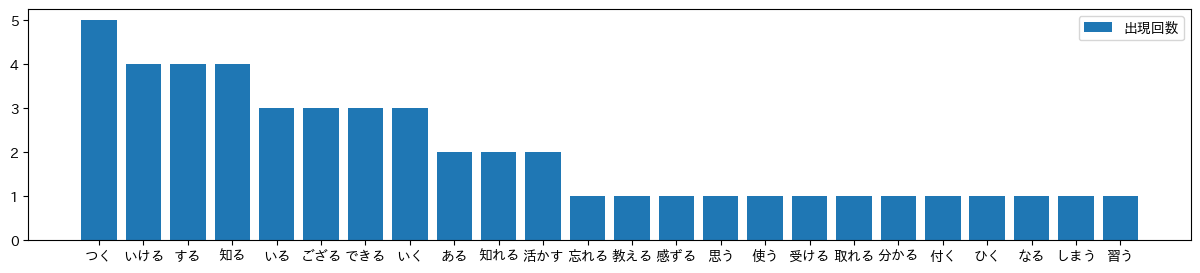

In [72]:
df_glaph = df.query('学年 == "A" & 大分類 == "動詞"').groupby('書字形(基本形)').count()['大分類'].sort_values(ascending=False)
plt.figure(figsize=(15, 3))
plt.bar(df_glaph.index, df_glaph, label='出現回数')
plt.legend()
plt.show()